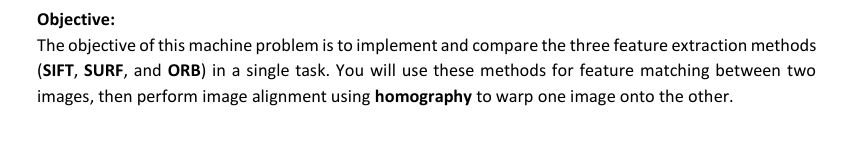

In [5]:
!apt-get update
!apt-get install -y cmake build-essential pkg-config

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,164 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,425 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/

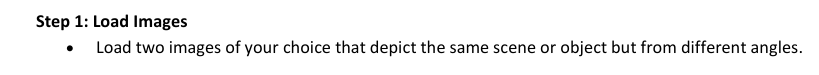

Saving Timage.png to Timage (1).png
Saving T2image.jpg to T2image.jpg


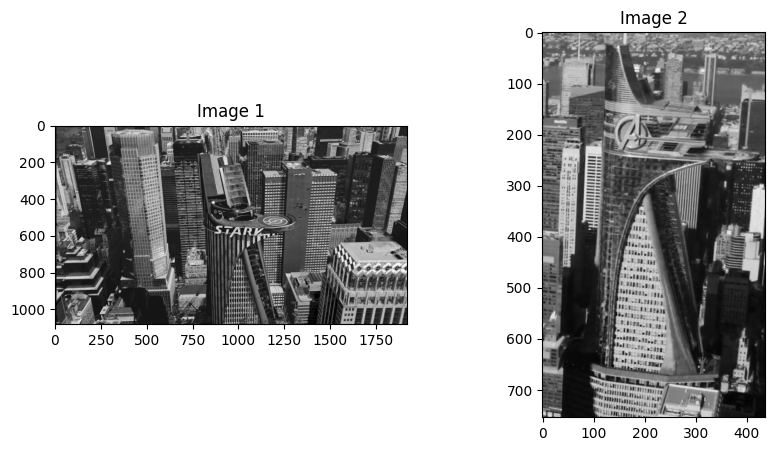

In [3]:
# Step 1: Load Images
import cv2
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

# Upload images
uploaded = files.upload()

# Load images using OpenCV
image1 = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(list(uploaded.keys())[1], cv2.IMREAD_GRAYSCALE)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image 1")
plt.imshow(image1, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Image 2")
plt.imshow(image2, cmap='gray')
plt.show()


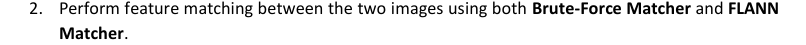

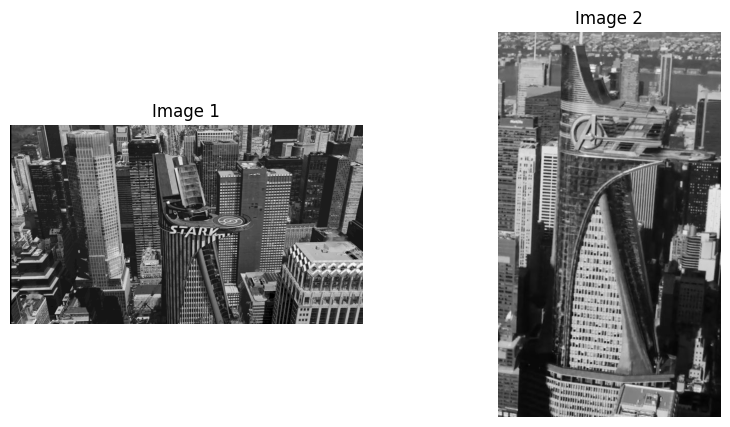

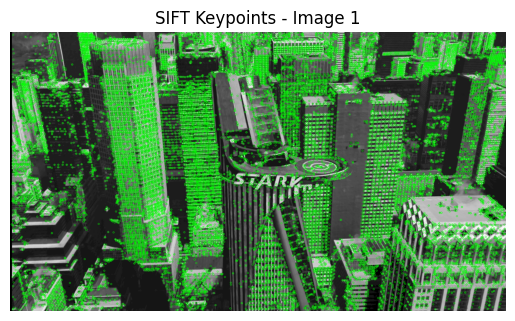

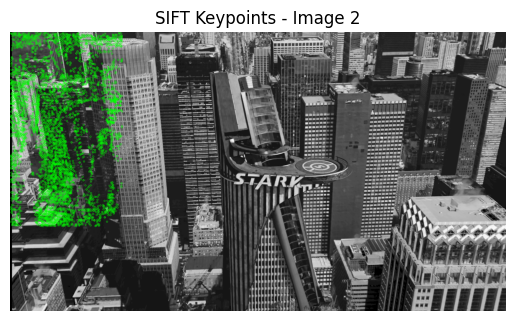

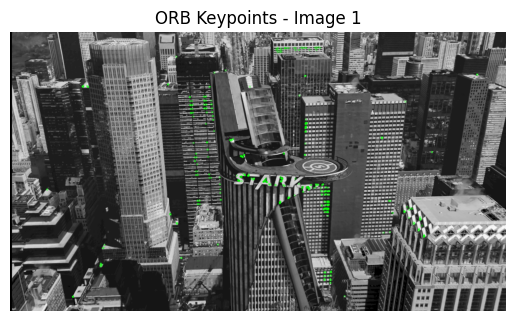

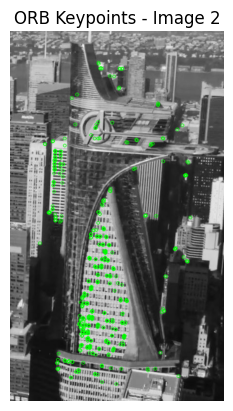

In [10]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images with the specified paths
image1_path = '/content/Timage.png'
image2_path = '/content/T2image.jpg'

# Read the images
image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Verify if the images are loaded correctly
if image1 is None or image2 is None:
    raise ValueError("Error: One or both images could not be loaded. Please check the file paths.")

# Display the images to verify successful loading
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image 1")
plt.imshow(image1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Image 2")
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.show()

# SIFT feature extractor
sift = cv2.SIFT_create()
keypoints_sift_1, descriptors_sift_1 = sift.detectAndCompute(image1, None)
keypoints_sift_2, descriptors_sift_2 = sift.detectAndCompute(image2, None)

# ORB feature extractor
orb = cv2.ORB_create()
keypoints_orb_1, descriptors_orb_1 = orb.detectAndCompute(image1, None)
keypoints_orb_2, descriptors_orb_2 = orb.detectAndCompute(image2, None)

# Visualize keypoints for each method
def visualize_keypoints(image, keypoints, title):
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display keypoints
visualize_keypoints(image1, keypoints_sift_1, 'SIFT Keypoints - Image 1')
visualize_keypoints(image1, keypoints_sift_2, 'SIFT Keypoints - Image 2')

visualize_keypoints(image1, keypoints_orb_1, 'ORB Keypoints - Image 1')
visualize_keypoints(image2, keypoints_orb_2, 'ORB Keypoints - Image 2')


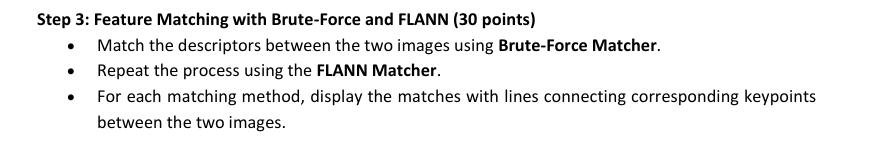

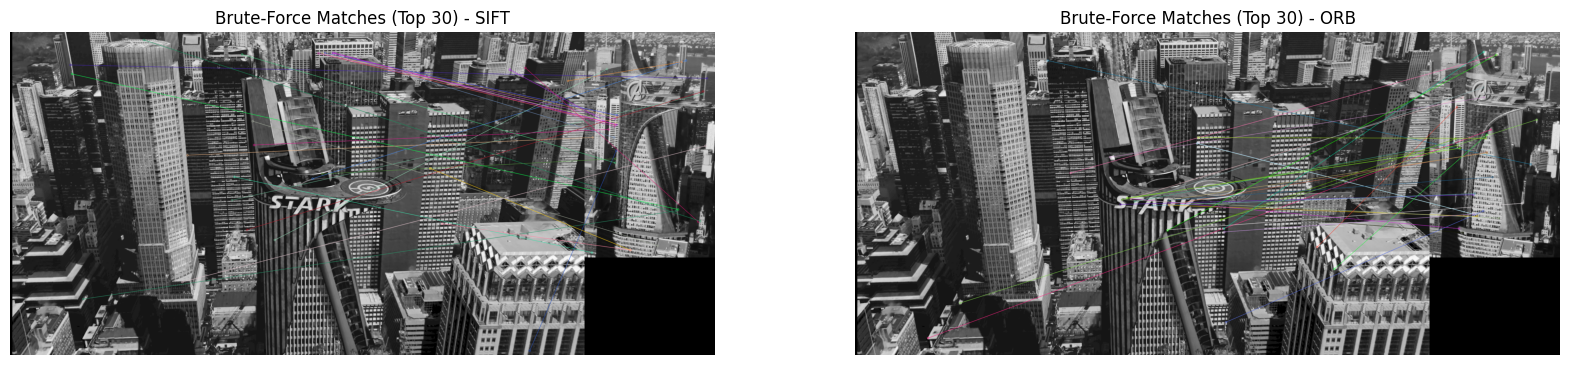

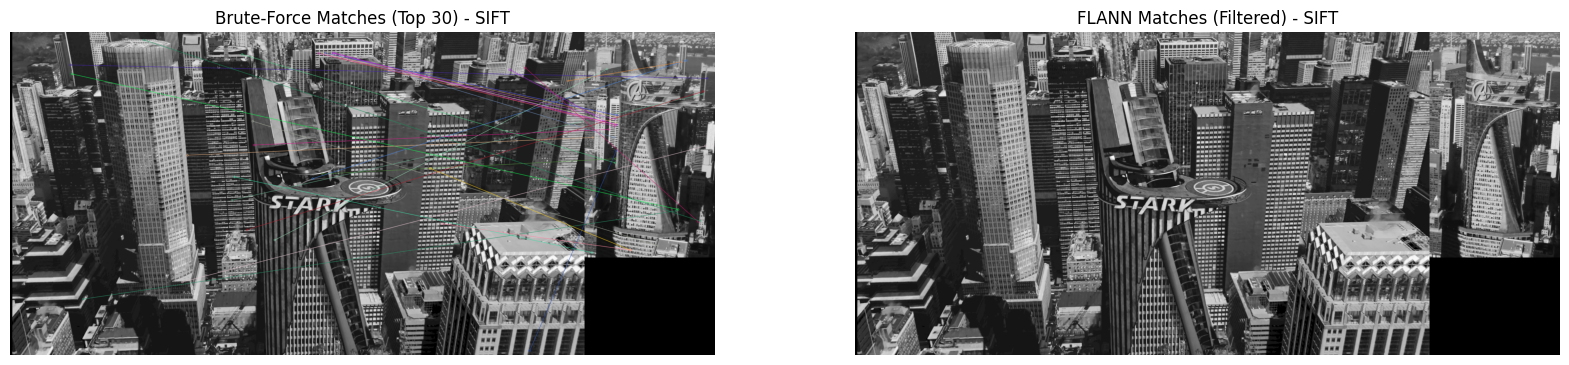

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images with the specified paths
image1_path = '/content/Timage.png'
image2_path = '/content/T2image.jpg'
image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
if image1 is None or image2 is None:
    raise ValueError("Error: One or both images could not be loaded. Please check the file paths.")

# SIFT feature extractor
sift = cv2.SIFT_create()
keypoints_sift_1, descriptors_sift_1 = sift.detectAndCompute(image1, None)
keypoints_sift_2, descriptors_sift_2 = sift.detectAndCompute(image2, None)

# ORB feature extractor
orb = cv2.ORB_create()
keypoints_orb_1, descriptors_orb_1 = orb.detectAndCompute(image1, None)
keypoints_orb_2, descriptors_orb_2 = orb.detectAndCompute(image2, None)

# Brute-Force Matcher for SIFT
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_bf_sift = bf.match(descriptors_sift_1, descriptors_sift_2)
matches_bf_sift = sorted(matches_bf_sift, key=lambda x: x.distance)[:30]

# Brute-Force Matcher for ORB
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_bf_orb = bf_orb.match(descriptors_orb_1, descriptors_orb_2)
matches_bf_orb = sorted(matches_bf_orb, key=lambda x: x.distance)[:30]

# FLANN Matcher for SIFT with a stricter Lowe’s ratio test
flann_index_kdtree = 1
index_params = dict(algorithm=flann_index_kdtree, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann_sift = flann.knnMatch(descriptors_sift_1, descriptors_sift_2, k=2)

# Apply Lowe's ratio test with stricter filtering
good_matches = []
for m, n in matches_flann_sift:
    if m.distance < 0.5 * n.distance:
        good_matches.append(m)

# Visualize
img_bf_sift = cv2.drawMatches(image1, keypoints_sift_1, image2, keypoints_sift_2, matches_bf_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_bf_orb = cv2.drawMatches(image1, keypoints_orb_1, image2, keypoints_orb_2, matches_bf_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Brute-Force Matches (Top 30) - SIFT')
plt.imshow(img_bf_sift)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Brute-Force Matches (Top 30) - ORB')
plt.imshow(img_bf_orb)
plt.axis('off')
plt.show()

img_flann_sift = cv2.drawMatches(image1, keypoints_sift_1, image2, keypoints_sift_2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Brute-Force Matches (Top 30) - SIFT')
plt.imshow(img_bf_sift)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('FLANN Matches (Filtered) - SIFT')
plt.imshow(img_flann_sift)
plt.axis('off')
plt.show()


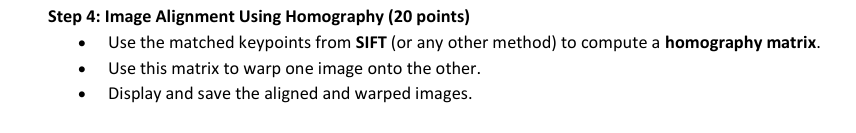

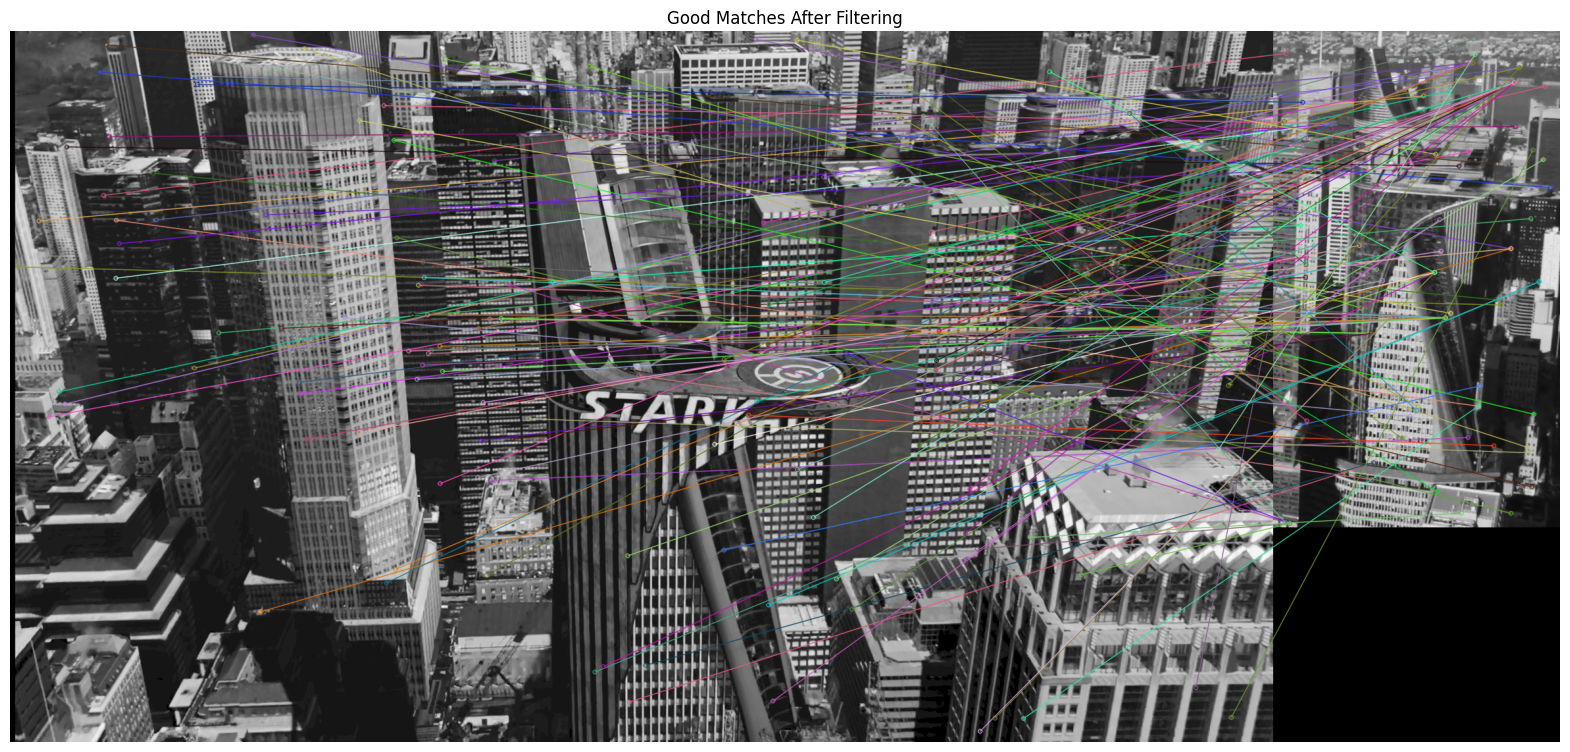

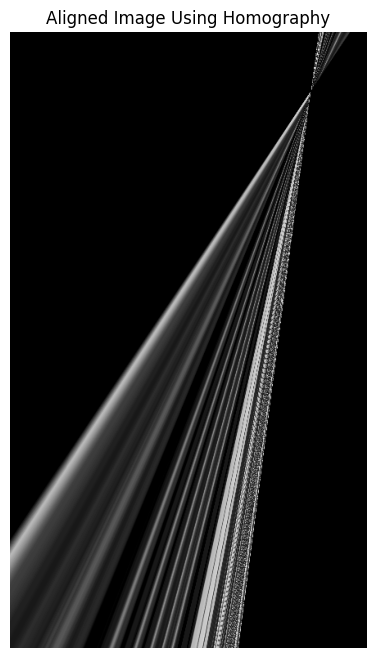

Aligned image saved as 'aligned_image.jpg'.


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1_path = '/content/Timage.png'
image2_path = '/content/T2image.jpg'
image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
if image1 is None or image2 is None:
    raise ValueError("Error: One or both images could not be loaded. Please check the file paths.")

# SIFT feature extractor
sift = cv2.SIFT_create(contrastThreshold=0.02, edgeThreshold=5)
keypoints_sift_1, descriptors_sift_1 = sift.detectAndCompute(image1, None)
keypoints_sift_2, descriptors_sift_2 = sift.detectAndCompute(image2, None)

# FLANN Matcher for SIFT
flann_index_kdtree = 1
index_params = dict(algorithm=flann_index_kdtree, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann_sift = flann.knnMatch(descriptors_sift_1, descriptors_sift_2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches_flann_sift:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

MIN_MATCH_COUNT = 10

if len(good_matches) > MIN_MATCH_COUNT:
    # Extract location of good matches
    src_pts = np.float32([keypoints_sift_1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints_sift_2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Visualize the good matches to verify their quality
    img_good_matches = cv2.drawMatches(image1, keypoints_sift_1, image2, keypoints_sift_2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20, 10))
    plt.title('Good Matches After Filtering')
    plt.imshow(img_good_matches)
    plt.axis('off')
    plt.show()

    # Compute homography matrix with a higher RANSAC threshold
    homography_matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 10.0)
    height, width = image2.shape
    aligned_image = cv2.warpPerspective(image1, homography_matrix, (width, height))

    # Display and save
    plt.figure(figsize=(10, 8))
    plt.title('Aligned Image Using Homography')
    plt.imshow(aligned_image, cmap='gray')
    plt.axis('off')
    plt.show()
    cv2.imwrite('/content/aligned_image.jpg', aligned_image)
else:
    print(f"Not enough matches are found - {len(good_matches)}/{MIN_MATCH_COUNT}")

# Save the aligned image to be used later
if len(good_matches) > MIN_MATCH_COUNT:
    print("Aligned image saved as 'aligned_image.jpg'.")
else:
    print("Could not compute homography due to insufficient matches.")
